In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score,ndcg_score

In [5]:
import urllib.request
logo = urllib.request.urlopen("https://drive.google.com/uc?export=download&id=1PCmLbAjAjseei3n_dQVwDqxArs25mIBJ").read()
f = open("test_df.csv", "wb")
f.write(logo)
f.close()
logo = urllib.request.urlopen("https://drive.google.com/uc?export=download&id=1r8iEoCt-qKEzbGrmT414vbv9_rbPlrNW").read()
f = open("train_df.csv", "wb")
f.write(logo)
f.close()

In [6]:
df_train=pd.read_csv('train_df.csv')
df_test=pd.read_csv('test_df.csv')

# EDA

In [ ]:
# Обучающие данные
df_train.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [ ]:
# Тестовые данные
df_test.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0


In [ ]:
# ID train_dataset
np.unique(df_train['search_id'])

In [ ]:
# ID test_dataset
np.unique(df_test['search_id'])

In [ ]:
# Пересечение IDs train_dataset&test_dataset
intersect_ids=set(df_test['search_id'])&set(df_train['search_id'])
print(f'Количество пересечений IDs для train и test: {len(intersect_ids)}')

Количество пересечений IDs для train и test: 0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   search_id   15081 non-null  int64  
 1   feature_0   15081 non-null  int64  
 2   feature_1   15081 non-null  int64  
 3   feature_2   15081 non-null  int64  
 4   feature_3   15081 non-null  int64  
 5   feature_4   15081 non-null  int64  
 6   feature_5   15081 non-null  int64  
 7   feature_6   15081 non-null  int64  
 8   feature_7   15081 non-null  int64  
 9   feature_8   15081 non-null  int64  
 10  feature_9   15081 non-null  int64  
 11  feature_10  15081 non-null  int64  
 12  feature_11  15081 non-null  int64  
 13  feature_12  15081 non-null  int64  
 14  feature_13  15081 non-null  int64  
 15  feature_14  15081 non-null  int64  
 16  feature_15  15081 non-null  int64  
 17  feature_16  15081 non-null  float64
 18  feature_17  15081 non-null  float64
 19  feature_18  15081 non-nul

In [ ]:
df_train.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,15081.000000,15081.0,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,...,15081.000000,15081.000000,15081.000000,15081.0,15081.0,15081.0,15081.000000,15081.000000,15081.000000,15081.000000
mean,254806.827465,9.0,0.193754,0.464293,0.629865,15.928519,3.876401,33.802467,1.211193,1.793847,...,0.199545,0.426543,0.096461,0.0,0.0,0.0,0.297465,0.030543,0.031207,0.021351
std,142374.568081,0.0,0.626654,1.183076,0.482857,5.311422,0.469749,11.316810,2.234887,1.885131,...,0.088724,0.247388,0.063323,0.0,0.0,0.0,0.311962,0.112984,0.115598,0.144558
min,116.000000,9.0,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,134823.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,26.000000,0.000000,0.000000,...,0.168583,0.255086,0.052658,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,255859.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,34.000000,0.000000,2.000000,...,0.212743,0.430880,0.091705,0.0,0.0,0.0,0.176140,0.000000,0.000000,0.000000
75%,376175.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,44.000000,1.000000,3.000000,...,0.253825,0.603686,0.136017,0.0,0.0,0.0,0.529100,0.000000,0.000000,0.000000
max,496975.000000,9.0,3.000000,6.000000,1.000000,20.000000,6.000000,49.000000,7.000000,7.000000,...,0.485510,0.999072,0.411563,0.0,0.0,0.0,1.000020,0.846272,0.908132,1.000000


In [ ]:
# Колчество объетов на id
df_train['search_id'].value_counts()

156182    20
8591      20
226704    20
227432    20
315998    20
          ..
155433     1
271166     1
178343     1
387764     1
303366     1
Name: search_id, Length: 1000, dtype: int64

In [ ]:
# Константные переменные
df_train.describe().T[df_train.describe().T['std']==0]

,count,mean,std,min,25%,50%,75%,max
feature_0,15081.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0
feature_73,15081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_74,15081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_75,15081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Матрица корреляций
corr = df_train.corr()
corr.style.background_gradient(cmap='RdYlGn')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
# Переменные с высокой корреляцией
corr[abs(corr)>=.8].unstack().sort_values().drop_duplicates()

feature_50  feature_46    0.821132
feature_48  feature_76    0.825842
feature_54  feature_55    0.847190
feature_62  feature_76    0.857022
feature_55  feature_63    0.859733
feature_65  feature_53    0.860164
feature_55  feature_65    0.862796
            feature_53    0.872157
feature_59  feature_11    0.889379
feature_72  feature_71    0.900260
feature_12  feature_60    0.907727
feature_63  feature_53    0.925749
feature_65  feature_63    0.937835
feature_78  feature_77    0.967949
feature_3   feature_4     1.000000
feature_55  feature_55    1.000000
search_id   feature_0          NaN
dtype: float64

Text(0.5, 1.0, 'target')

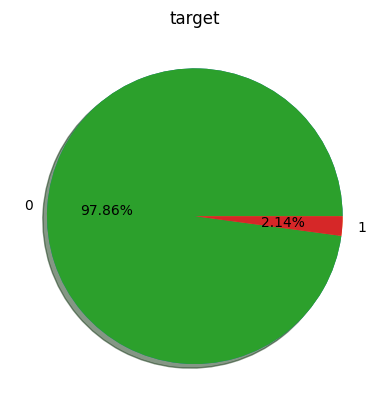

In [ ]:
fig, ax = plt.subplots()
plt.pie(df_train['target'].value_counts())
x = df_train['target'].value_counts()
index = x.index
ax.pie(labels=index, x=x, autopct='%1.2f%%', shadow=True)
ax.set_title('target')

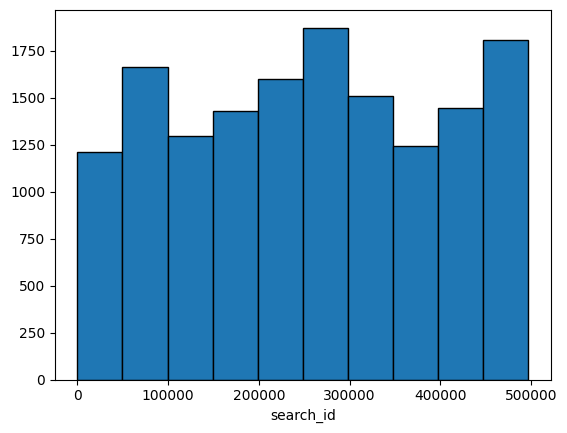

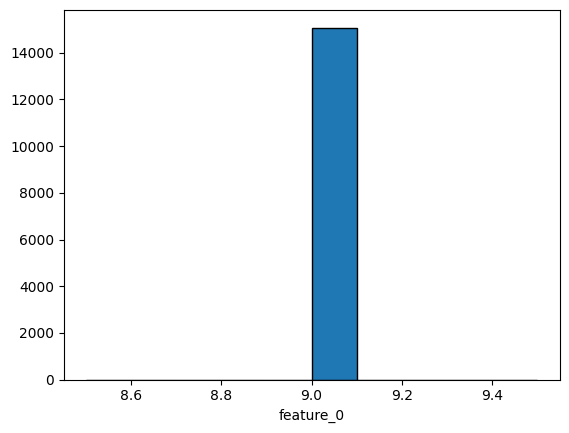

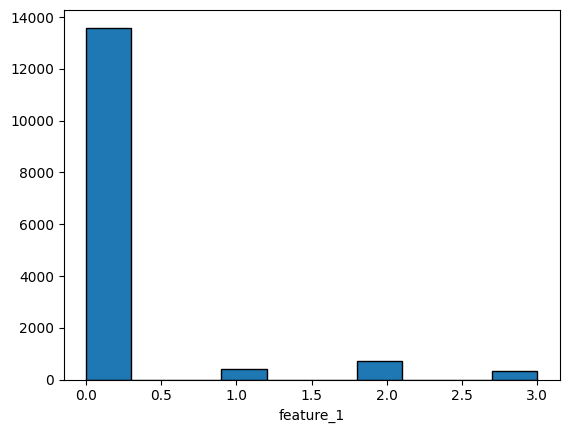

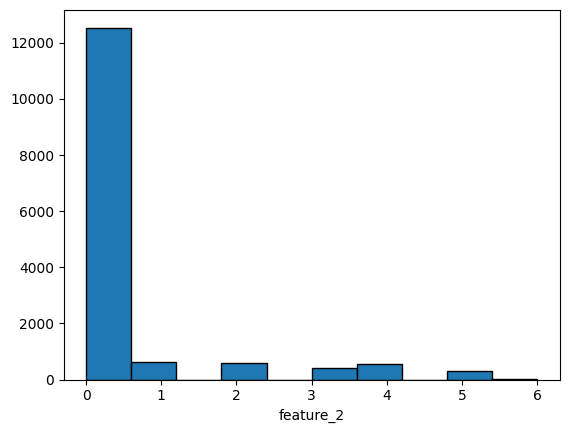

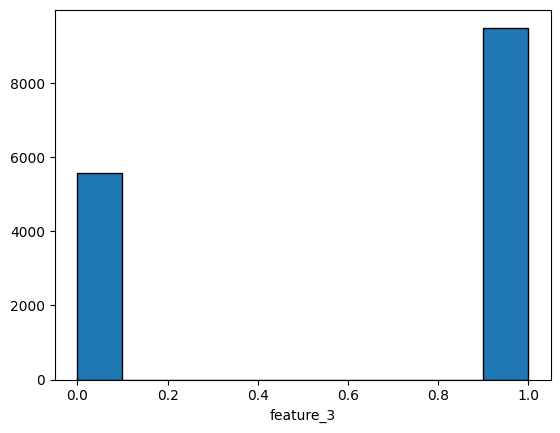

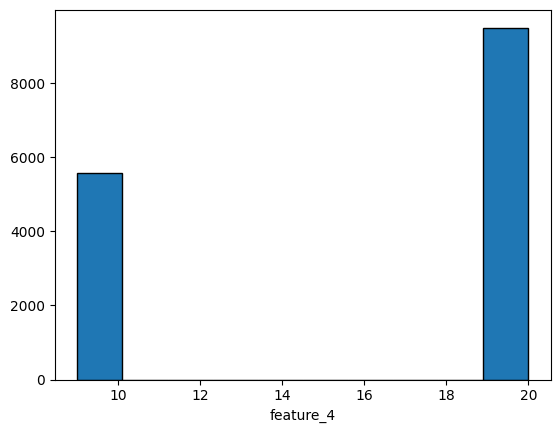

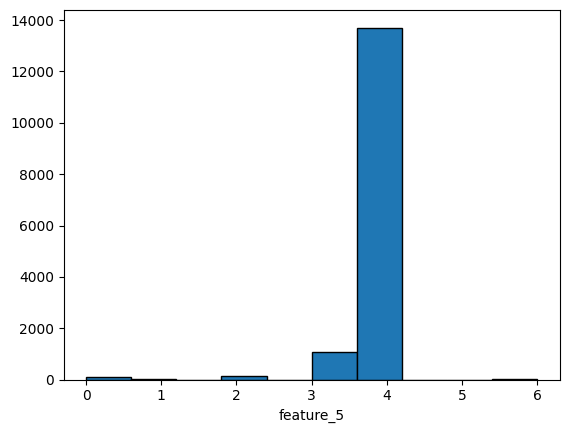

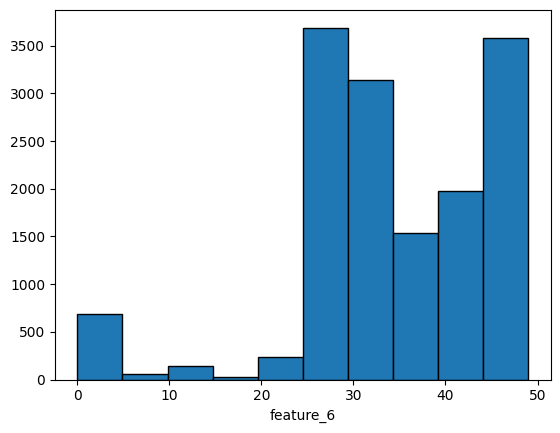

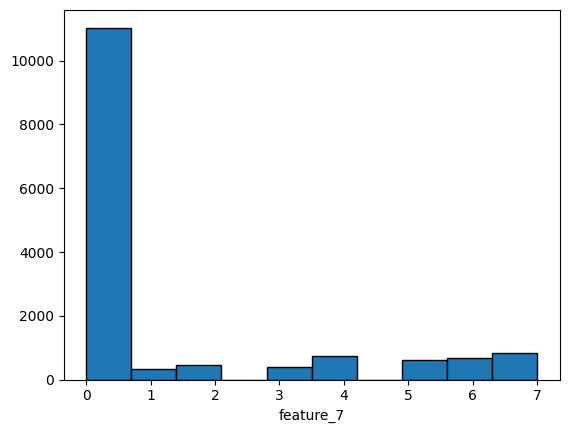

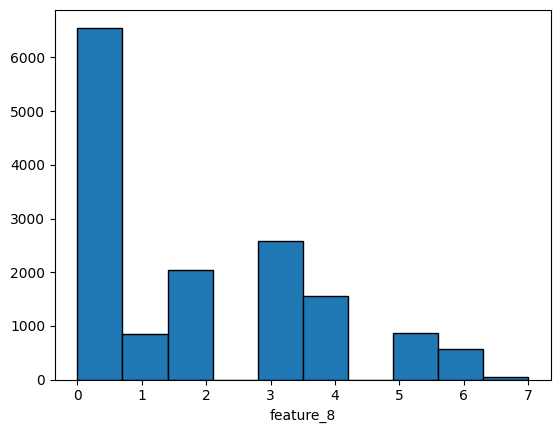

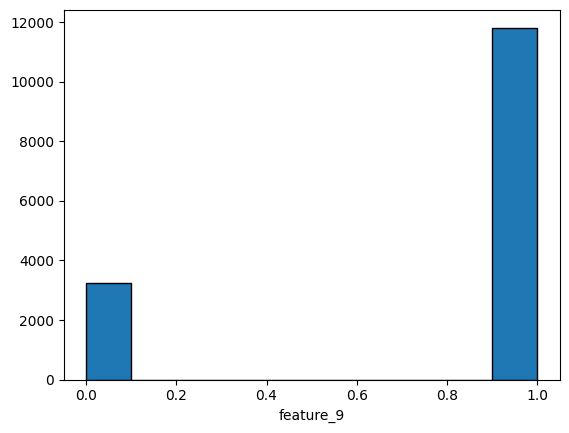

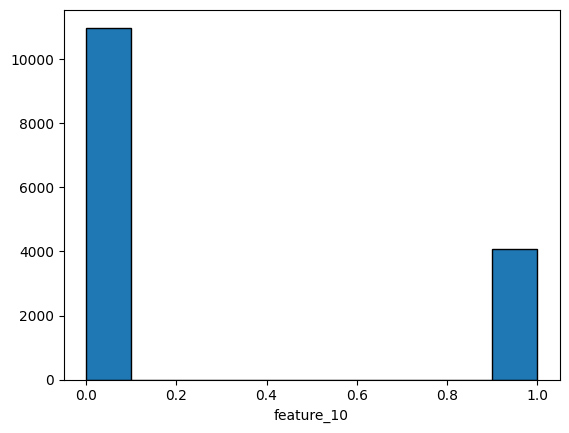

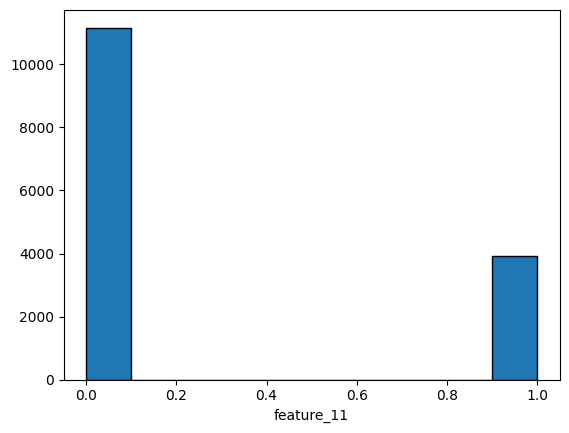

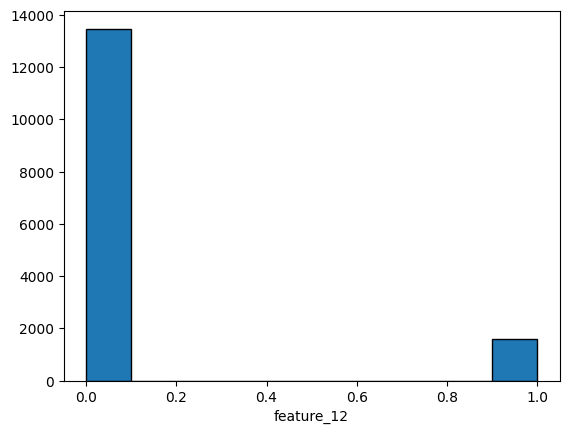

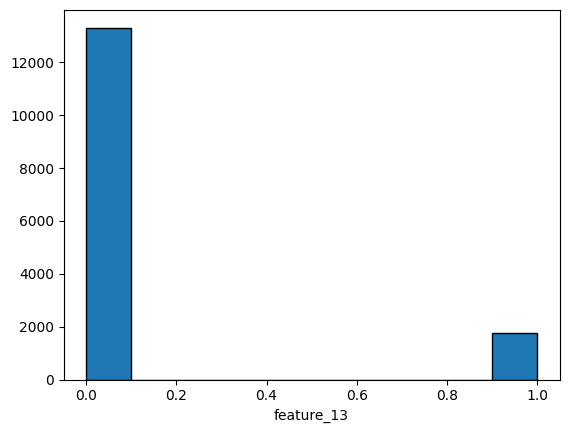

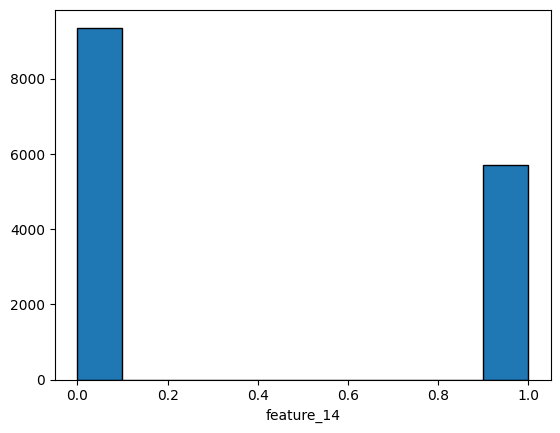

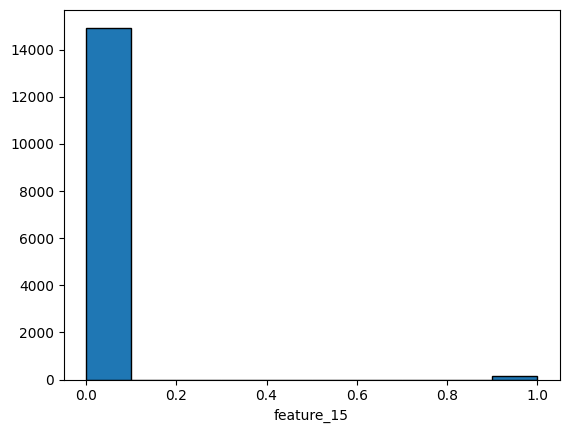

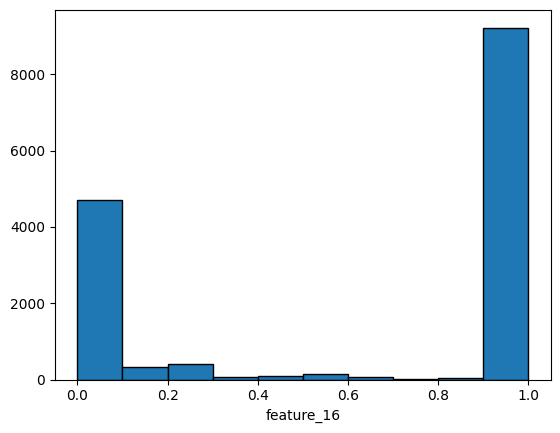

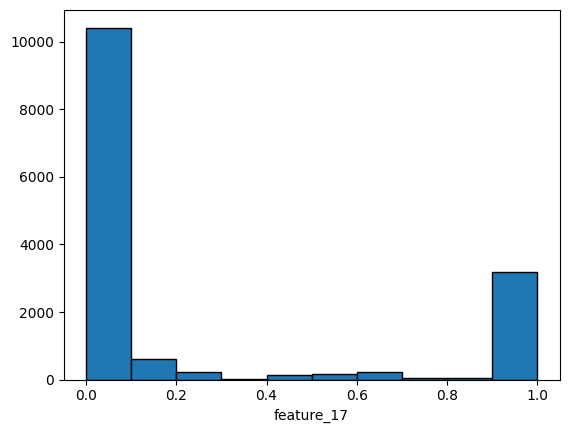

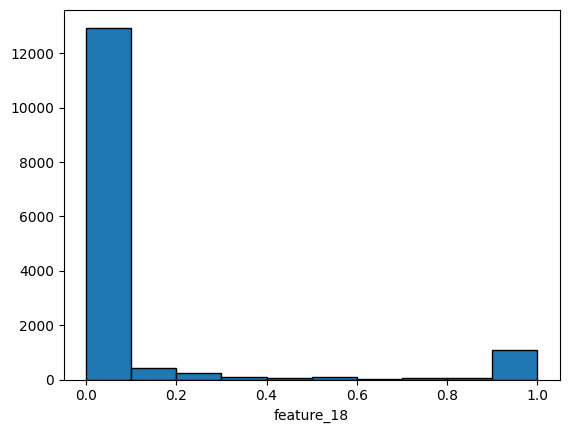

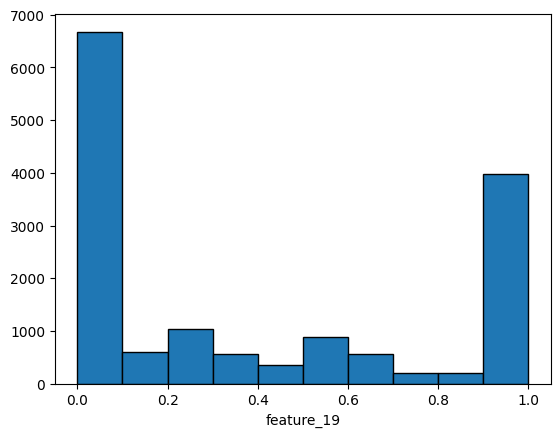

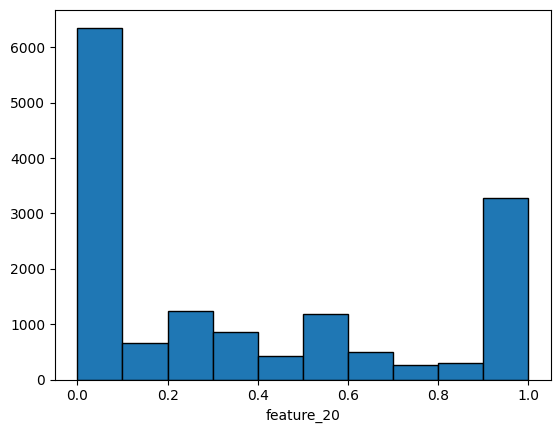

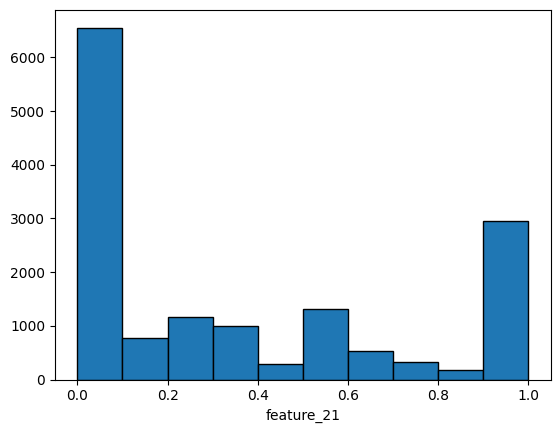

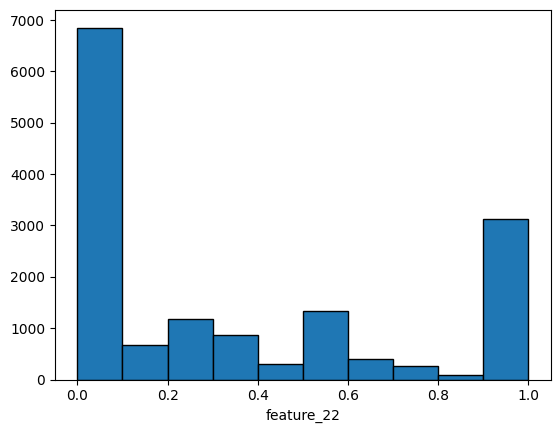

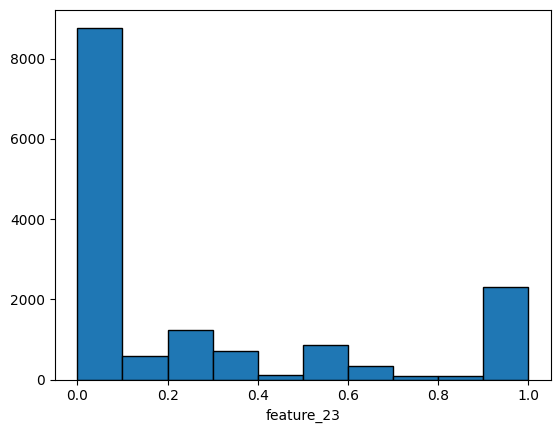

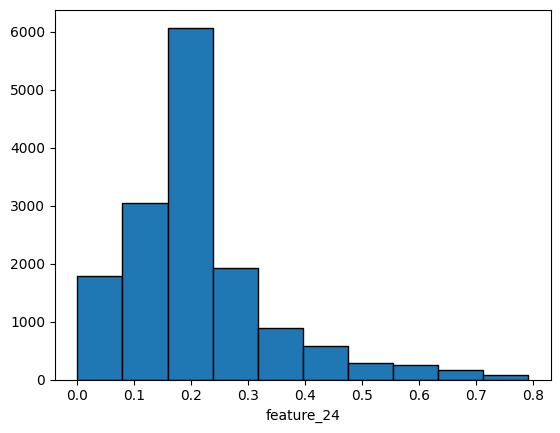

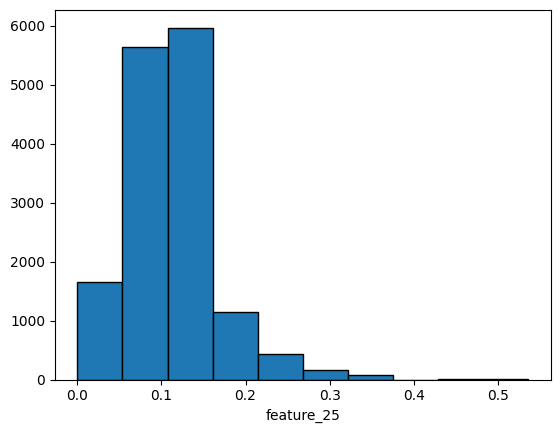

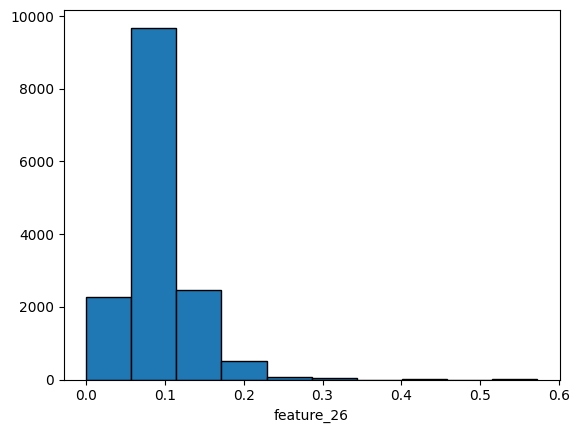

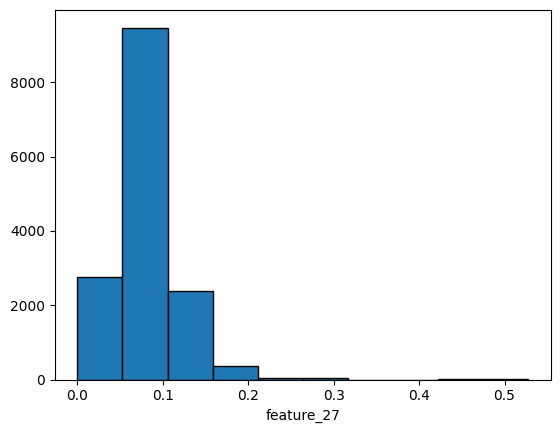

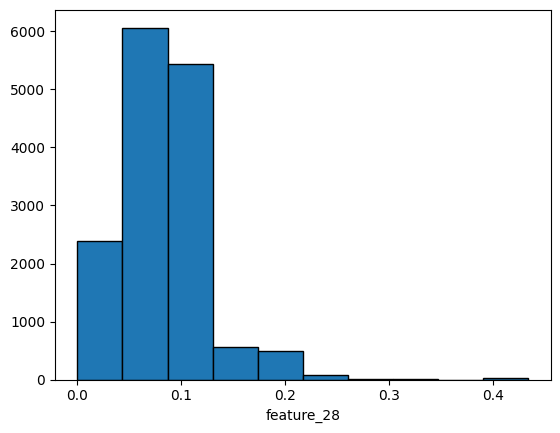

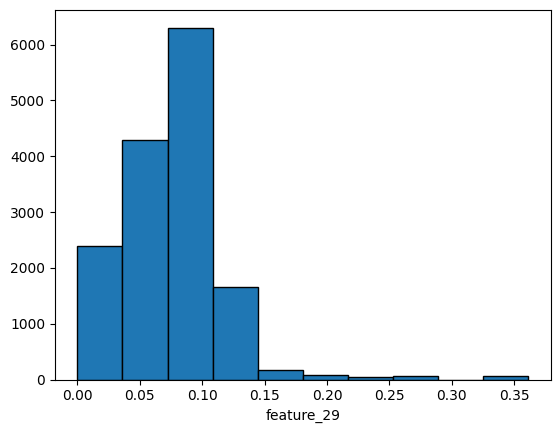

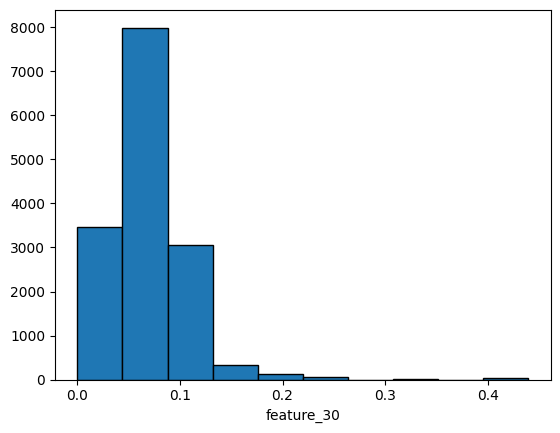

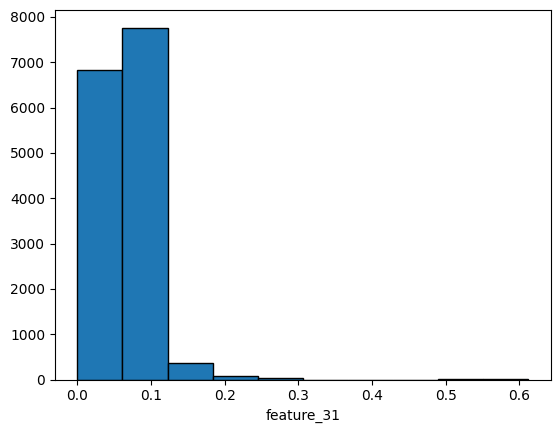

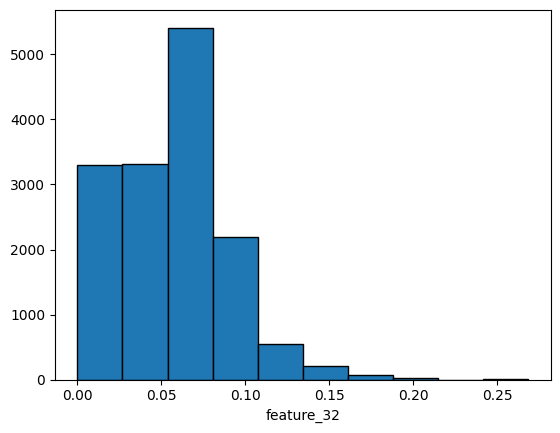

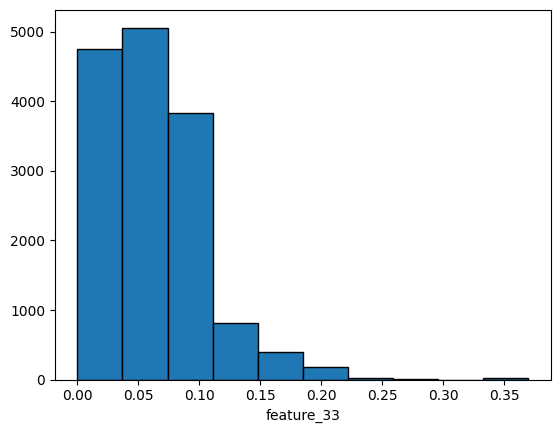

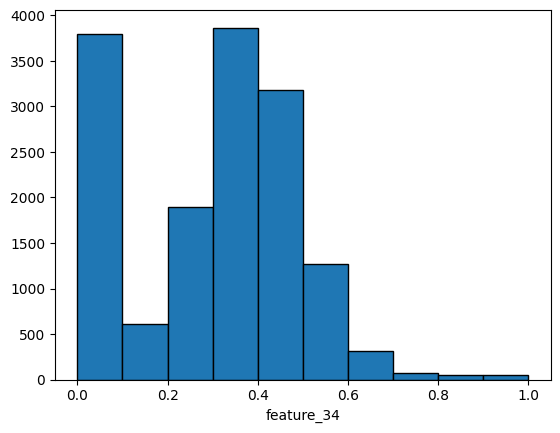

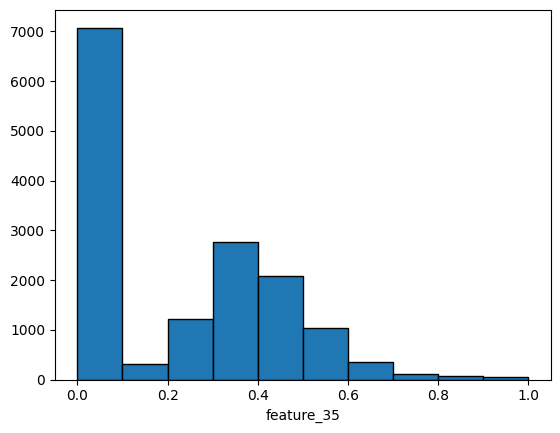

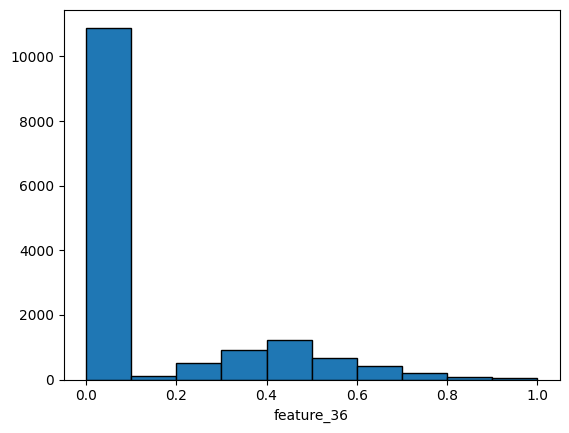

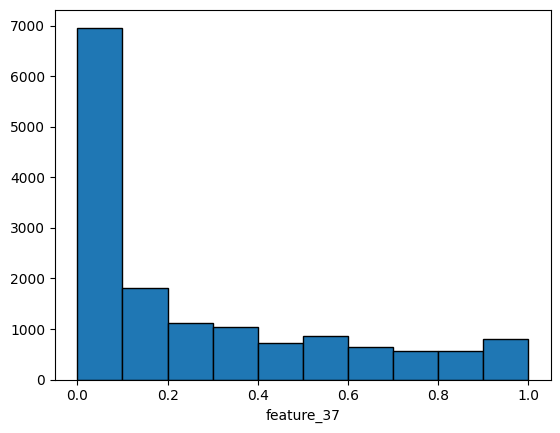

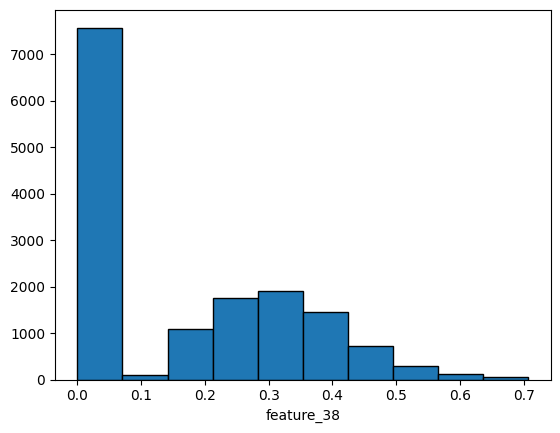

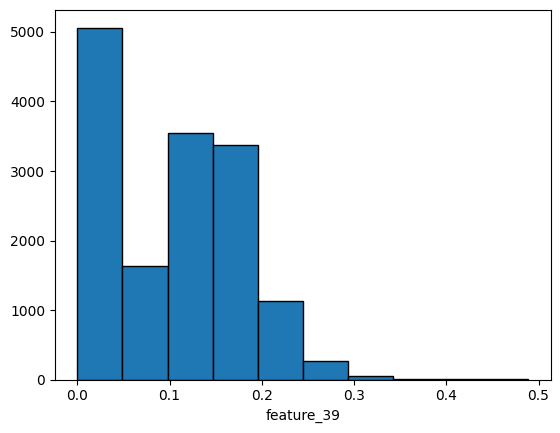

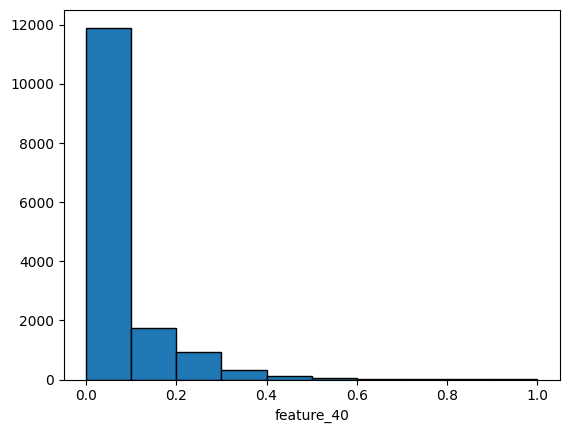

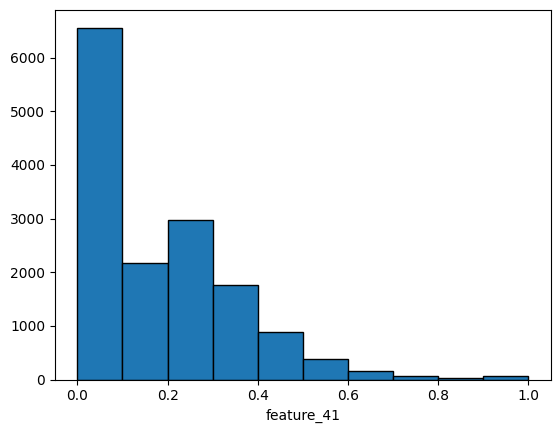

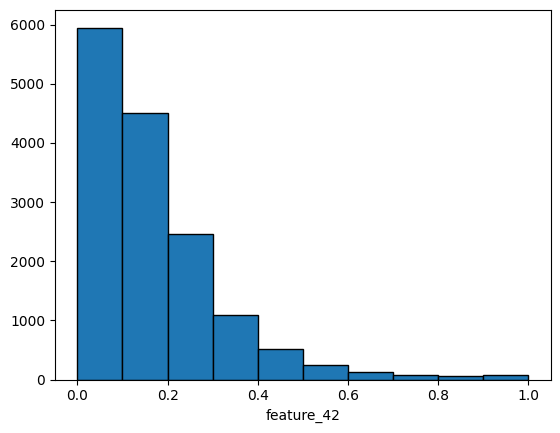

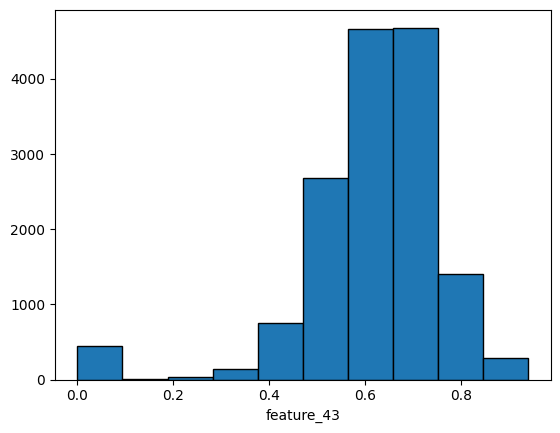

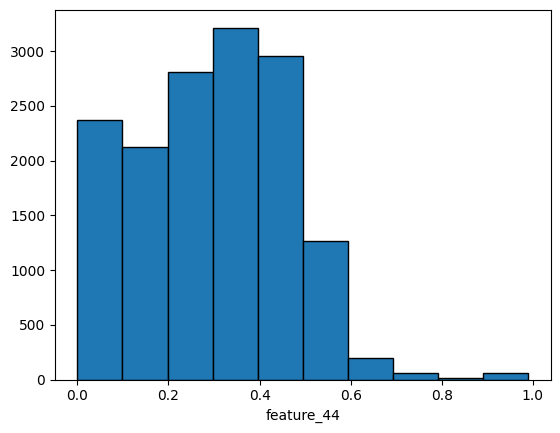

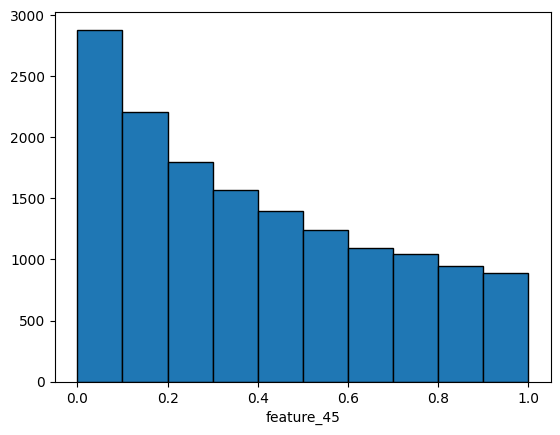

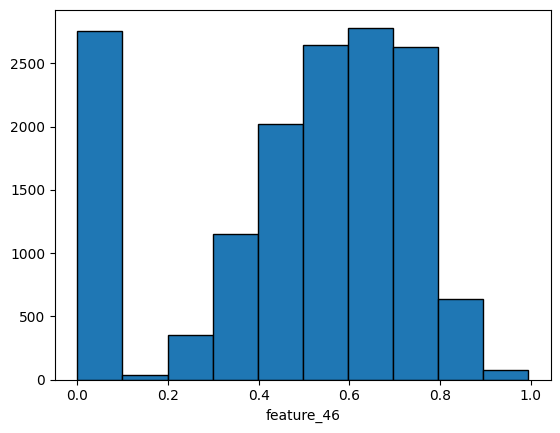

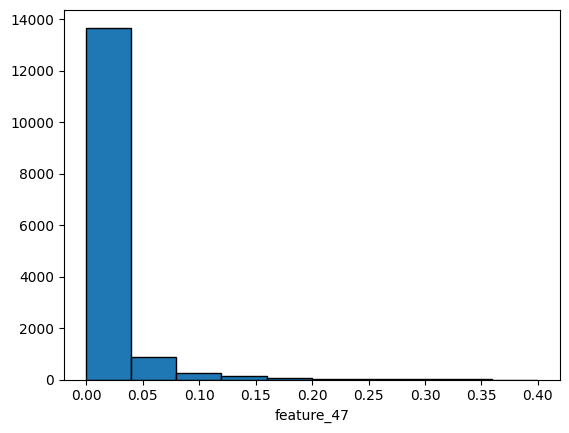

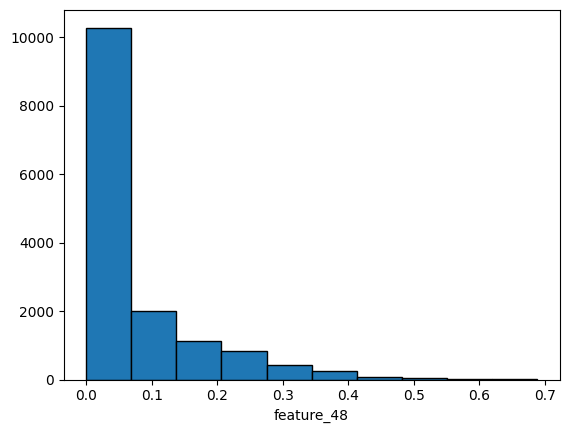

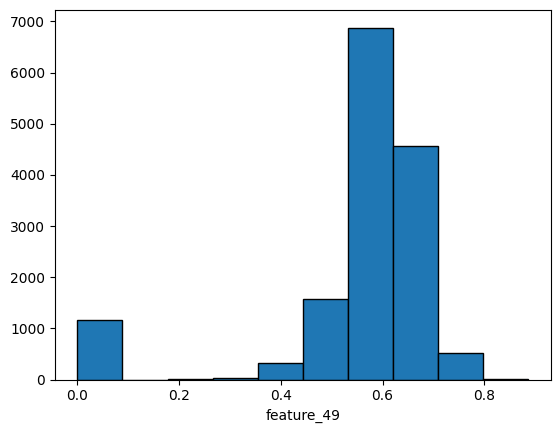

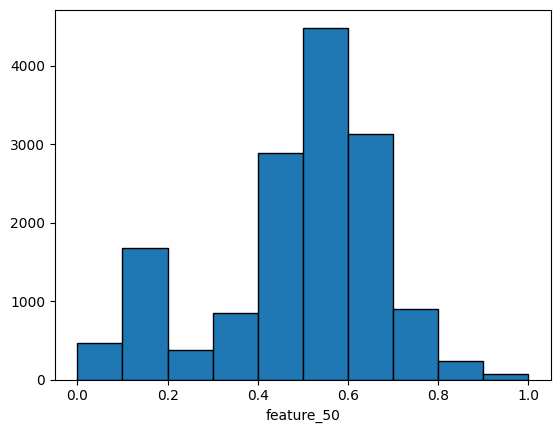

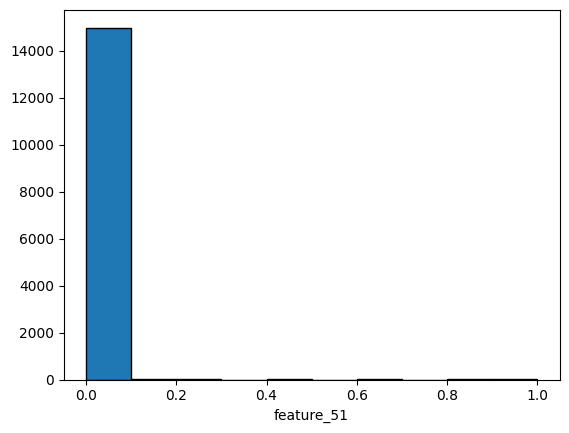

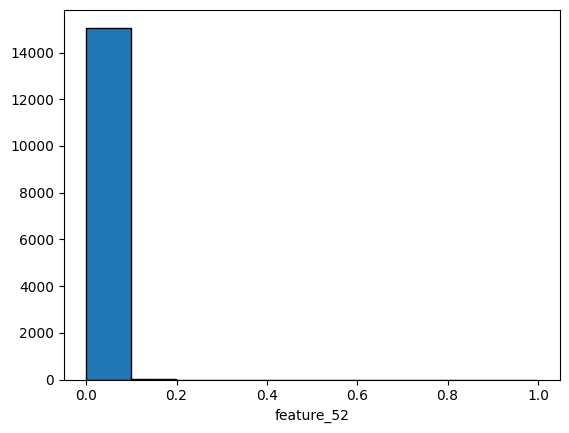

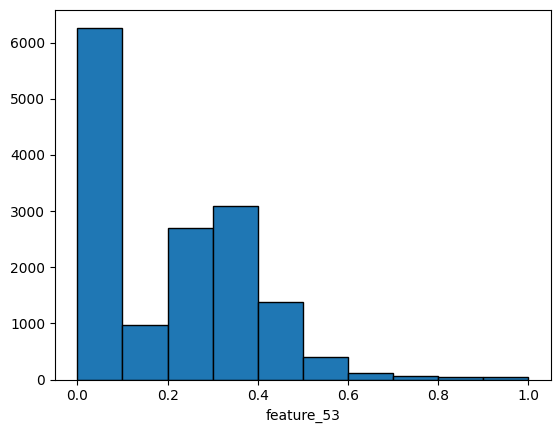

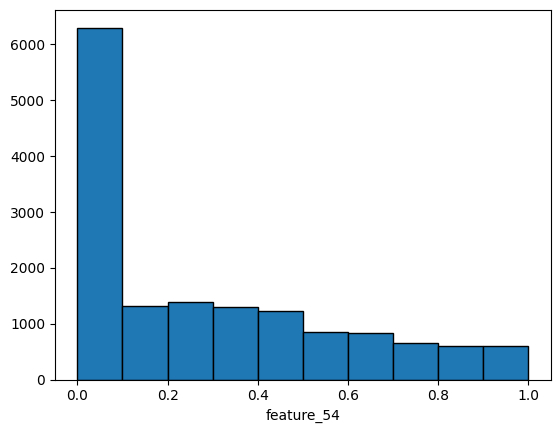

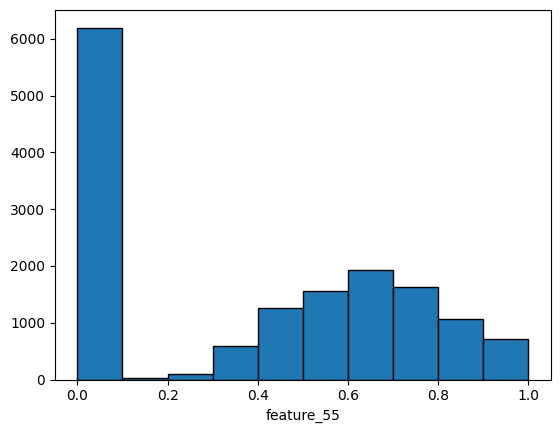

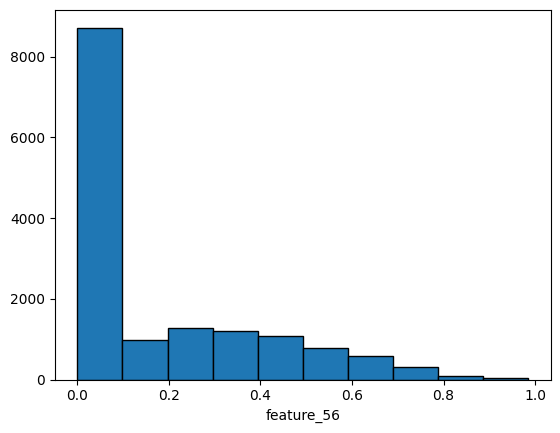

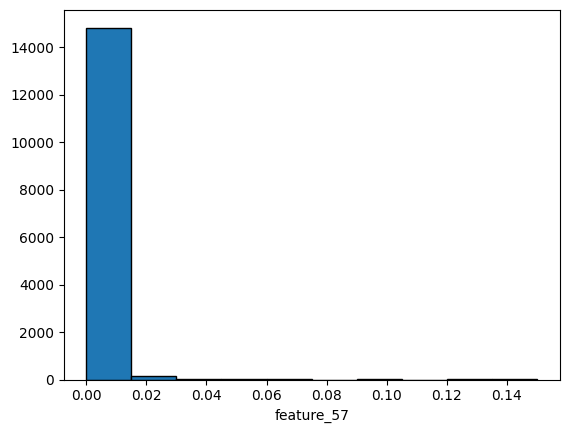

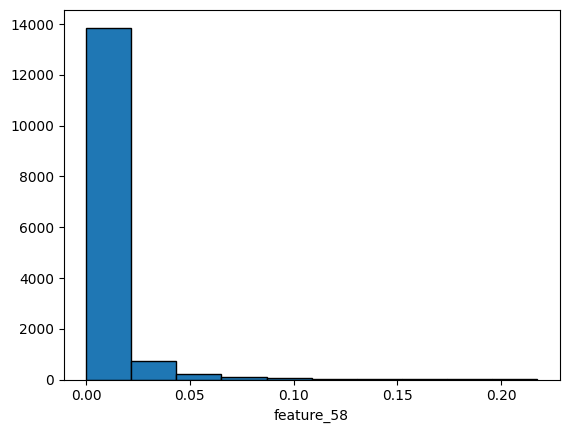

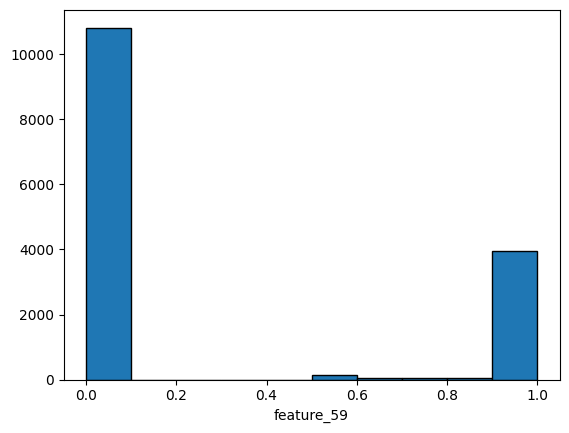

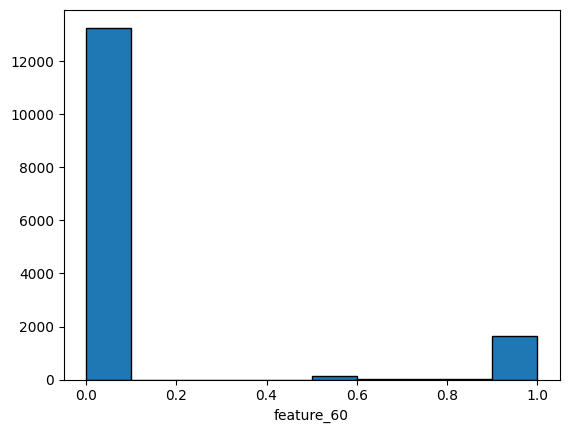

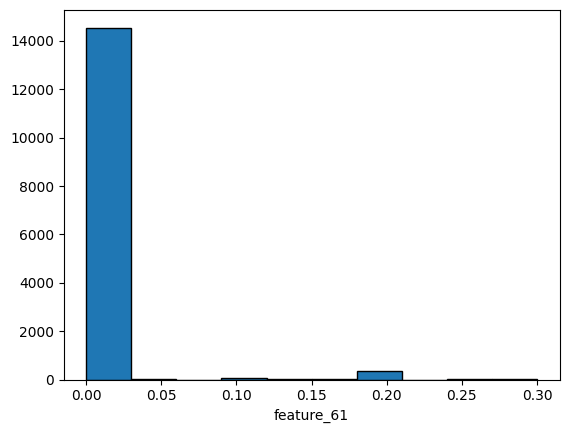

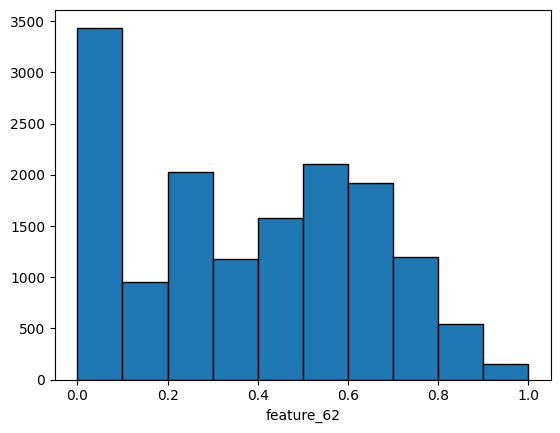

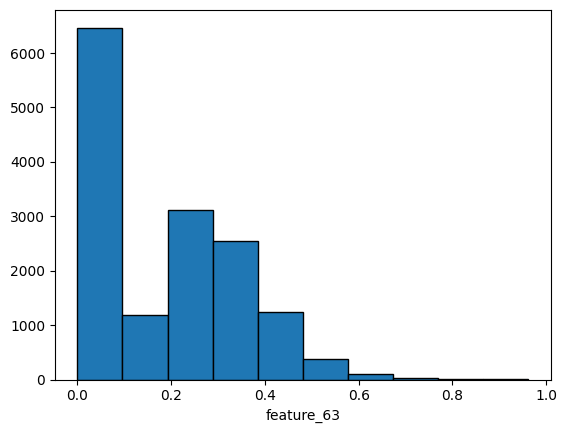

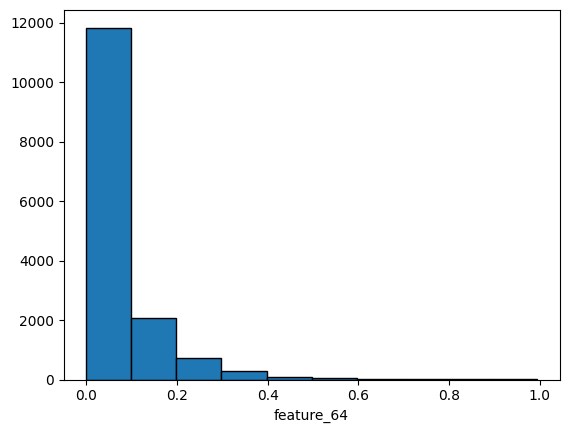

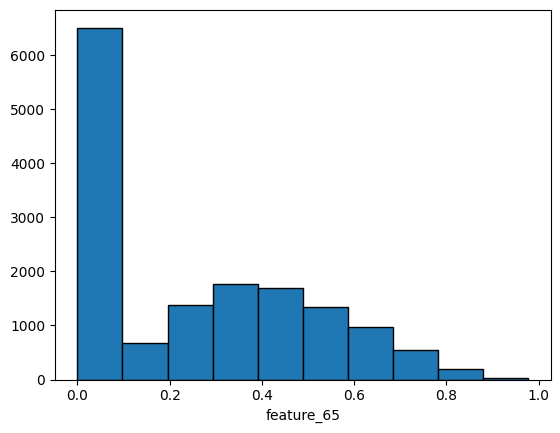

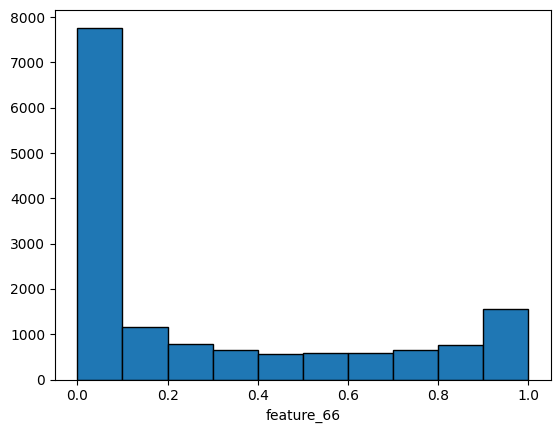

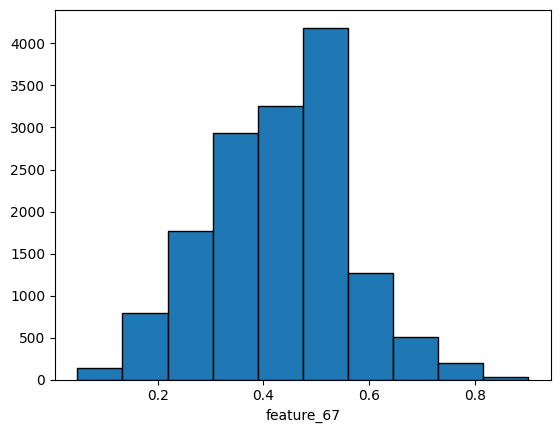

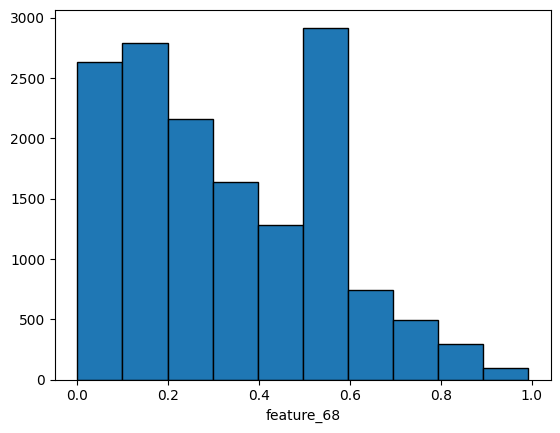

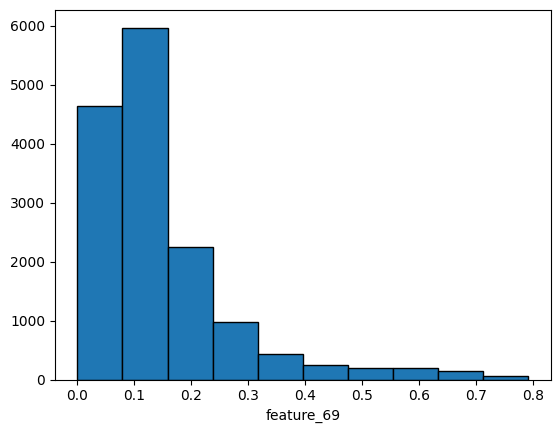

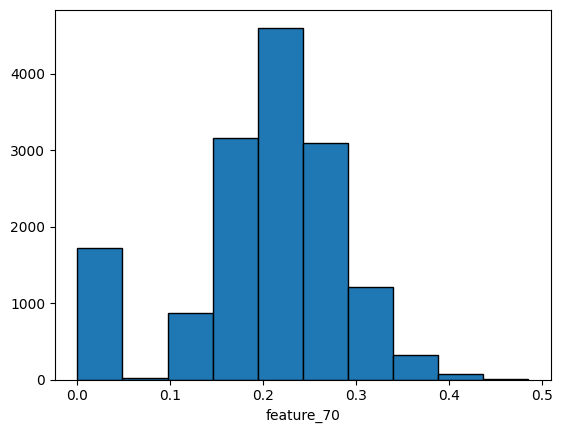

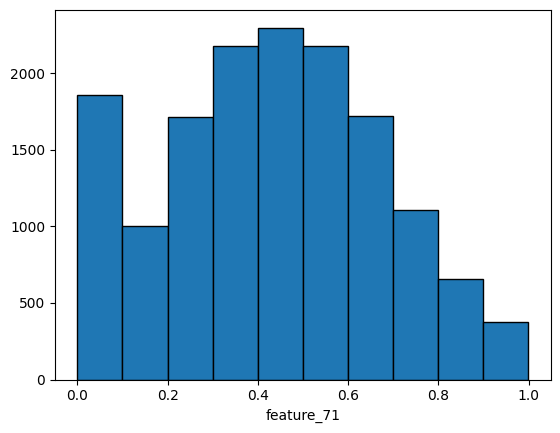

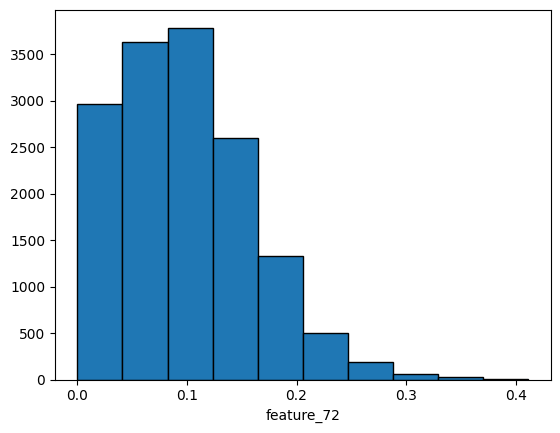

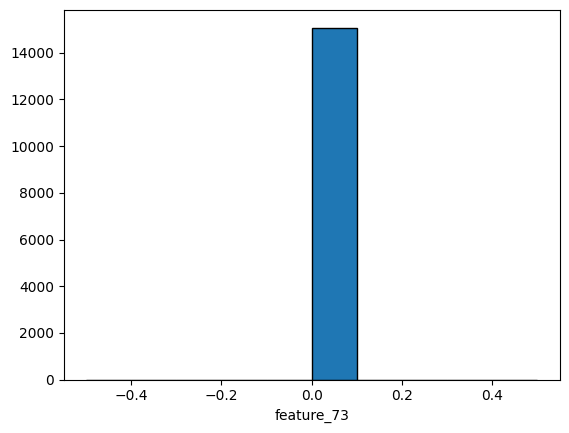

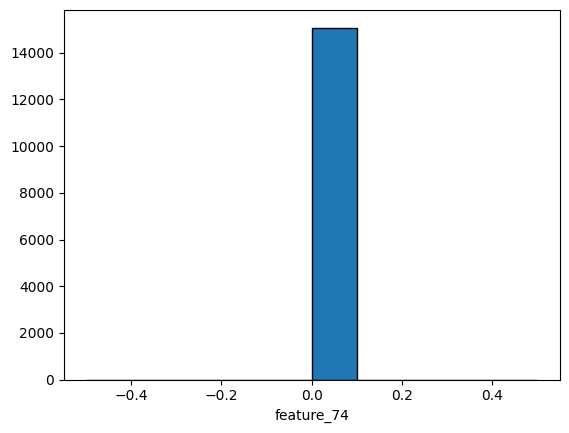

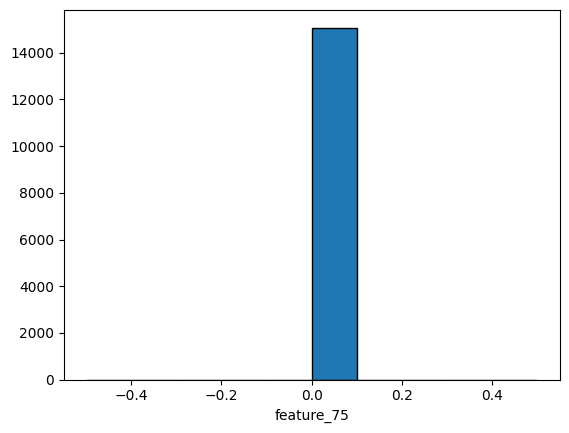

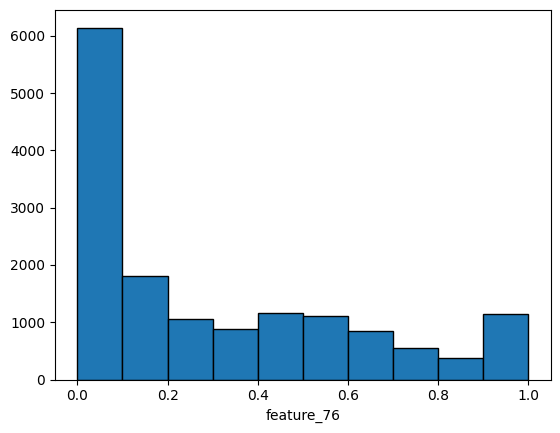

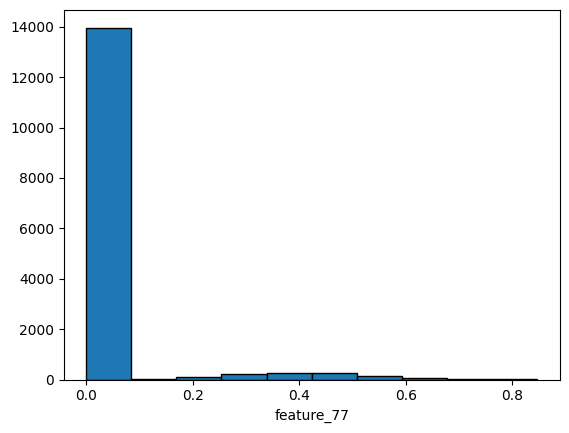

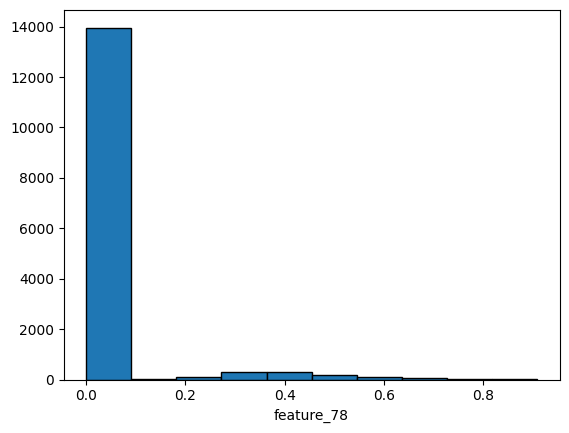

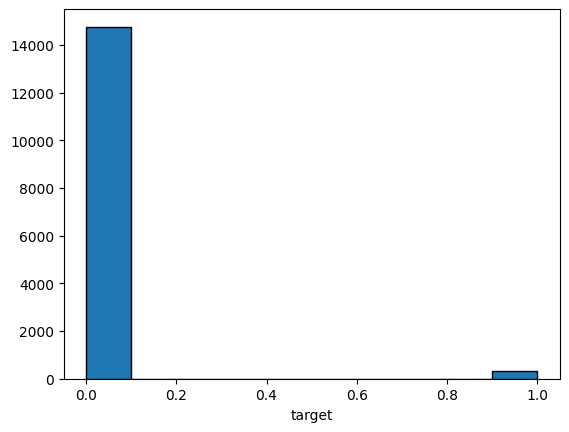

In [ ]:
for c in df_train.columns:
  plt.hist(df_train[c], edgecolor = "black")
  plt.xlabel(c)
  plt.show()

In [ ]:
X_train=df_train.drop(columns=["search_id",'feature_0', 'feature_73', 'feature_74', 'feature_75'])
sns.set()
sns.pairplot(X_train, corner=True)

### Исследование дублей и NaN-значений

In [ ]:
print('Количество дублей: ',df_train.duplicated().sum())
print('Количество nan-значени:',sum(df_train.isnull().sum()))

Количество дублей:  12
Количество nan-значени: 0


In [ ]:
# Дубли
df_train[df_train.duplicated()]

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
395,58362,9,0,4,0,9,4,26,3,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1590,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1595,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3047,303632,9,0,0,0,9,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3775,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3778,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3780,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
4690,471930,9,0,0,1,20,4,40,0,2,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
10985,97300,9,0,0,0,9,4,38,0,3,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
10999,97922,9,0,0,1,20,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0


In [ ]:
df_train.T[df_train.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,15071,15072,15073,15074,15075,15076,15077,15078,15079,15080
feature_74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature_75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Дубли
df_train[df_train.duplicated(keep=False)]

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
390,58362,9,0,4,0,9,4,26,3,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
395,58362,9,0,4,0,9,4,26,3,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1584,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1590,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1595,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3035,303632,9,0,0,0,9,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3047,303632,9,0,0,0,9,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3765,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3775,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3778,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0


In [ ]:
df_train.drop_duplicates()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [ ]:
#function for draw to values of correlations
def corr(*args,**kwargs):
  r=args[0].corr(args[1],'pearson')
  text=f"{r:2.2f}".replace("0.",".")
  ax=plt.gca()
  ax.set_axis_off()
  marker_size=abs(r)*10000
  ax.scatter([.5],[.5],marker_size,[r],alpha=0.6,cmap="bwr",transform=ax.transAxes,vmin=-1,vmax=1)
  font_size=abs(r)*40+5
  ax.annotate(text,[.5,.5,],ha='center',va='center',xycoords="axes fraction",fontsize=font_size)
#function for install xlim for each subplots
def xdist(*args,**kwargs):
  ax=plt.gca()
  ax.set(xlim=(args[0].min(),None))

_=sns.set(style='white',font_scale=1.6)
_=plt.figure(figsize=(14,8))
_=ax=sns.PairGrid(df_train.drop(columns=["search_id"]),diag_sharey=False,aspect=1.4)
_=ax.map_upper(corr)
_=ax.map_lower(sns.regplot,ci=False,line_kws={'color':'red'})
_=ax.map_diag(sns.histplot)
_=ax.map_diag(xdist)
ax.fig.suptitle("Pairplot of variables", y=1)
ax.fig.subplots_adjust(wspace=0.03,hspace=0.03)

# Подготовка данных

In [14]:
#Подготовка обучающие данные

#Удаление дублей
df_train_prep=df_train.drop_duplicates()
print(f'Удалили {(df_train.shape[0]-df_train_prep.shape[0])/df_train.shape[0]*100:.2}% данных как дубли')

Удалили 0.08% данных как дубли


In [ ]:
df_train_prep["target"].value_counts()

0    14747
1      322
Name: target, dtype: int64

In [15]:
X_train = df_train_prep.drop(columns=["search_id", "target"])
y_train = df_train_prep["target"].values

In [16]:
X_test = df_test.drop(columns=["search_id", "target"])
y_test = df_test["target"].values

In [ ]:
# Константные признаки
const_features = [col for col in X_train.columns if X_train[col].nunique()== 1]
const_features

['feature_0', 'feature_73', 'feature_74', 'feature_75']

In [12]:
# Отбор признаков с высокой корреляцией

def select_corr_features(df,treshhold):
  corr_matrix_abs=df.corr().abs()
  corr_matrix_abs_us = corr_matrix_abs.unstack()
  sorted_corr_features = corr_matrix_abs_us.sort_values(kind="quicksort", ascending=False).reset_index()
  # удаляем пары с главной диагонали
  sorted_corr_features = sorted_corr_features[(sorted_corr_features.level_0 != sorted_corr_features.level_1)]
  sorted_corr_features=sorted_corr_features.iloc[:-2:2]
  df_result=sorted_corr_features[sorted_corr_features[0]>=treshhold]
  return df_result.reset_index(drop=True)

remove_feature_list=[]
treshold=0.75
select_corr_features_list=select_corr_features(df_train,treshold)
for i in range(len(select_corr_features_list)):
  if select_corr_features_list['level_0'][i] not in remove_feature_list and select_corr_features_list['level_1'][i] not in remove_feature_list:
    if select_corr_features_list['level_0'][i] not in remove_feature_list:
      remove_feature_list.append(select_corr_features_list['level_0'][i])
    else:
      remove_feature_list.append(select_corr_features_list['level_1'][i])
print(f'Отобранные признаки с корреляцией >= {treshold}')
print(*remove_feature_list,sep=', ')

Отобранные признаки с корреляцией >= 0.75
feature_3, feature_78, feature_65, feature_63, feature_12, feature_71, feature_11, feature_53, feature_62, feature_54, feature_76, feature_46, feature_39


# Эксперименты

### Boosting

In [ ]:
# CatBoost

In [ ]:
!pip install catboost

In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score

In [ ]:
# Baseline
model = CatBoostClassifier()
model.fit(X_train, y_train, verbose=None)

In [ ]:
y_pred = model.predict_proba(X_test)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.4799620931246103


#### Feature_importance

In [ ]:
stat=model.get_feature_importance(prettified=True)
stat

,Feature Id,Importances
0,feature_70,4.794258
1,feature_51,3.424952
2,feature_67,3.020351
3,feature_66,2.982251
4,feature_26,2.942231
...,...,...
74,feature_12,0.042904
75,feature_0,0.000000
76,feature_73,0.000000
77,feature_74,0.000000


In [ ]:
!pip install shap

In [ ]:
from catboost import CatBoostClassifier, Pool

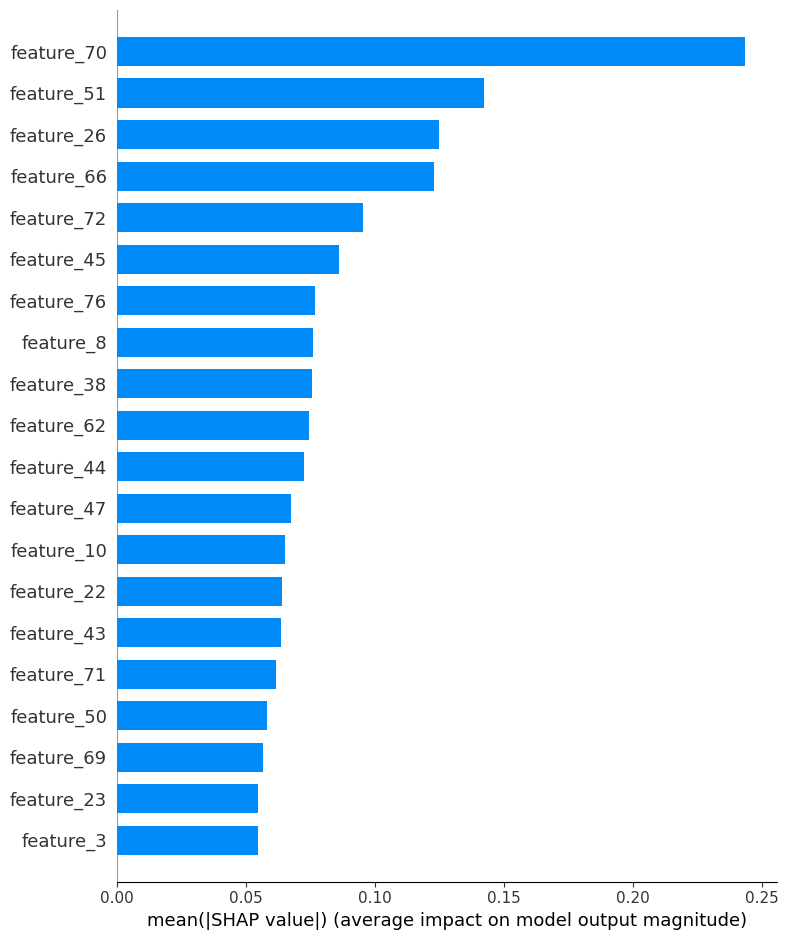

In [ ]:
import shap

shap_test = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_test, X_train, auto_size_plot=True,plot_type="bar")

In [ ]:
insign_feature=list(stat[stat['Importances']<0.5]['Feature Id'])
insign_feature

['feature_36',
 'feature_48',
 'feature_3',
 'feature_60',
 'feature_4',
 'feature_57',
 'feature_59',
 'feature_2',
 'feature_9',
 'feature_78',
 'feature_77',
 'feature_15',
 'feature_13',
 'feature_11',
 'feature_14',
 'feature_12',
 'feature_0',
 'feature_73',
 'feature_74',
 'feature_75']

#### Кросс-валидация

In [ ]:
from
 import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold
from tabulate import tabulate


# grid_param={'iterations_values' : [100, 200],'depth_values' : [4,6, 8],'learning_rate_values' : [0.1, 0.05, 0.01]}
def search_param_cross_val(X,y, grid_param):
  best_score = 0  # Инициализация best score
  best_params = {}  # Инициализация best hyperparameters

  # Cross-validation settings
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  tuning_progress = []

  X=pd.DataFrame(X)
  y=pd.DataFrame(y)

  # Оценка гиперпараметров + кросс-валидация
  for iterations in grid_param['iterations_values']:
      for depth in grid_param['depth_values']:
          for learning_rate in grid_param['learning_rate_values']:
              # Создание CatBoost model с текущими гиперпараметрами
              model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, verbose=False)

              ndcg_scores = []
              roc_auc_scores=[]
              for train_index, val_index in cv.split(X, y):
                X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                model.fit(X_train, y_train,verbose=False)
                y_pred = model.predict_proba(X_val)
                ndcg=ndcg_score(np.array(y_val).ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)
                # f1 = f1_score(np.array(y_val), y_pred[:,1])
                ndcg_scores.append(ndcg)
                # y_pred = model.predict(X_val)
                # roc_auc=roc_auc_score(y_val,y_pred)
                # roc_auc_scores.append(roc_auc)

              mean_ndcg = sum(ndcg_scores) / len(ndcg_scores)
              # mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

              # Update the best hyperparameters if a better score is found
              if mean_ndcg > best_score:
                  best_score = mean_ndcg
                  best_params = {
                      'iterations': iterations,
                      'depth': depth,
                      'learning_rate': learning_rate
                  }

              # Append the progress to the list
              tuning_progress.append({
                  'Iterations': iterations,
                  'Depth': depth,
                  'Learning Rate': learning_rate,
                  # 'ROC_AUC Score': mean_roc_auc,
                  'NDCG Score': mean_ndcg
              })
  return tuning_progress, best_params

In [ ]:
grid_param={'iterations_values' : [100, 200],'depth_values' : [4,6, 8],'learning_rate_values' : [0.1, 0.05, 0.01]}
tuning_progress, best_params=search_param_cross_val(X_train,pd.DataFrame(y_train), grid_param)

In [ ]:
print(tabulate(tuning_progress, headers='keys', tablefmt='pretty'))
# print("Best Hyperparameters:", best_params)

+------------+-------+---------------+---------------------+
| Iterations | Depth | Learning Rate |     NDCG Score      |
+------------+-------+---------------+---------------------+
|    100     |   4   |      0.1      | 0.5014299286253007  |
|    100     |   4   |     0.05      |  0.520498471720586  |
|    100     |   4   |     0.01      | 0.4997678115671273  |
|    100     |   6   |      0.1      | 0.5042900746315626  |
|    100     |   6   |     0.05      | 0.5198634939192801  |
|    100     |   6   |     0.01      | 0.5102329988569866  |
|    100     |   8   |      0.1      | 0.5058306497122554  |
|    100     |   8   |     0.05      | 0.5061783357533857  |
|    100     |   8   |     0.01      | 0.5010442777920654  |
|    200     |   4   |      0.1      | 0.49878744952989396 |
|    200     |   4   |     0.05      | 0.5144233715751338  |
|    200     |   4   |     0.01      | 0.5142713967843443  |
|    200     |   6   |      0.1      | 0.5018318833770292  |
|    200     |   6   |  

In [ ]:
best_params={'iterations': 100, 'depth': 4, 'learning_rate': 0.05}
model=CatBoostClassifier(**best_params, verbose= False)
model.fit(X_train,y_train)

In [29]:
y_pred = model.predict_proba(X_test)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.6163078319048177


### Отбор features

In [ ]:
#Отбор на основе корреляционного анализа
remove_feature_list=[]
treshold=0.8
select_corr_features_list=select_corr_features(df_train,treshold)
for i in range(len(select_corr_features_list)):
  if select_corr_features_list['level_0'][i] not in remove_feature_list and select_corr_features_list['level_1'][i] not in remove_feature_list:
    if select_corr_features_list['level_0'][i] not in remove_feature_list:
      remove_feature_list.append(select_corr_features_list['level_0'][i])
    else:
      remove_feature_list.append(select_corr_features_list['level_1'][i])
print(f'Отобранные признаки с корреляцией >= {treshold}')
print(*remove_feature_list,sep=', ')

Отобранные признаки с корреляцией >= 0.8
feature_3, feature_78, feature_65, feature_63, feature_12, feature_71, feature_11, feature_53, feature_62, feature_54, feature_76, feature_46


In [ ]:
#Константные переменные
const_features = [col for col in df_train.columns if df_train[col].nunique() == 1]

In [ ]:
remove_l_new=remove_feature_list.copy()
remove_l_new.extend(const_features)
X_train_in_f = X_train.drop(columns=remove_l_new)
X_test_in_f = X_test.drop(columns=remove_l_new)

In [ ]:
best_params={'iterations': 100, 'depth': 4, 'learning_rate': 0.05}
model=CatBoostClassifier(**best_params, verbose= False)
model.fit(X_train_in_f,y_train)

In [ ]:
y_pred = model.predict_proba(X_test_in_f)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.5838144149117611


## LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
scaler = StandardScaler()
logistic = LogisticRegression()

In [ ]:
# Без отбора признаков
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train, y_train)
y_pred=pipe.predict_proba(X_test)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.5817051555711024


In [ ]:
# C отбором признаков
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train_in_f, y_train)
y_pred=pipe.predict_proba(X_test_in_f)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.601045781978958


In [ ]:
scaler = StandardScaler()
logistic = LogisticRegression(penalty='l1',solver='liblinear')
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
pipe.fit(X_train_in_f, y_train)
y_pred=pipe.predict_proba(X_test_in_f)
print(f"NDCG score: {ndcg_score(y_test.ravel().reshape(1, -1), y_pred[:,1].ravel().reshape(1, -1),k=None)}")

NDCG score: 0.6031183259529819
